Loading required package: coda
Linked to JAGS 4.2.0
Loaded modules: basemod,bugs


,Dose,Logdose,Positive,Total
1,12023,4.08,4,5
2,23988,4.38,5,6
3,66069,4.82,2,6
4,93325,4.97,4,6
5,141254,5.15,5,6
6,257040,5.41,2,6
7,588844,5.77,4,6
8,851138,5.93,5,6
9,89125,4.95,1,6
10,446684,5.65,3,6


Compiling model graph
   Resolving undeclared variables
   Allocating nodes
Graph information:
   Observed stochastic nodes: 38
   Unobserved stochastic nodes: 41
   Total graph size: 262

Initializing model


Iterations = 2100:22000
Thinning interval = 100 
Number of chains = 3 
Sample size per chain = 200 

1. Empirical mean and standard deviation for each variable,
   plus standard error of the mean:

          Mean       SD Naive SE Time-series SE
beta[1] -7.255   1.6474  0.06725        0.12090
beta[2]  1.433   0.2903  0.01185        0.02121
tau     18.918 139.0414  5.67634        9.66155

2. Quantiles for each variable:

            2.5%     25%    50%    75%  97.5%
beta[1] -10.6696 -8.3454 -7.097 -6.132 -4.293
beta[2]   0.9281  1.2231  1.398  1.620  2.059
tau       0.3796  0.8068  1.315  2.381 88.017



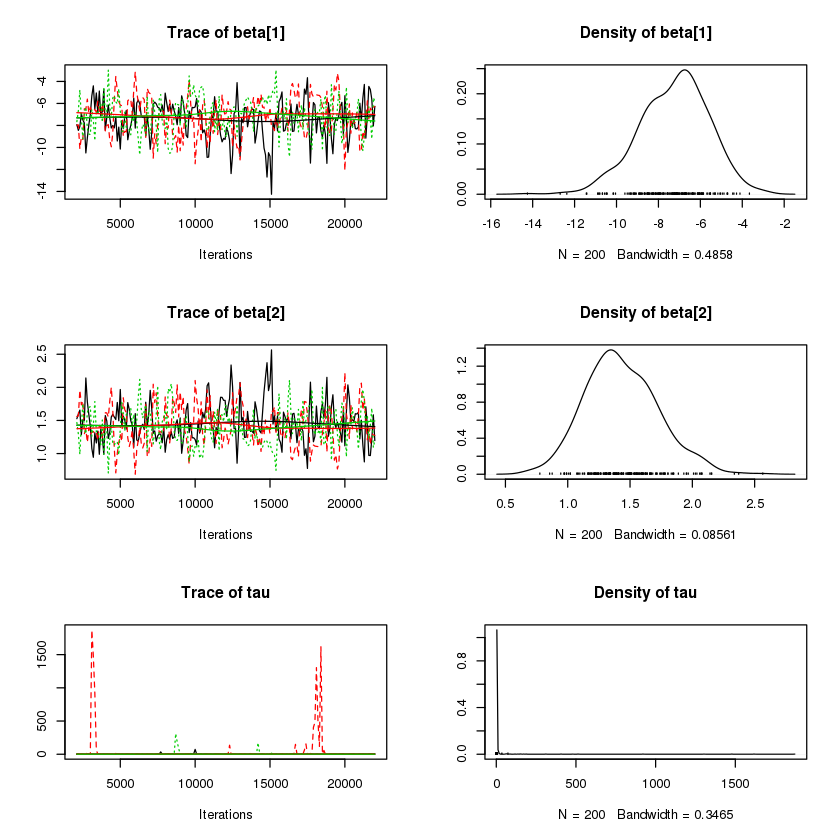

In [1]:
library(rjags)
d <- read.csv("dummydata.csv")
d

list.data <- list(
	Positive = d$Positive,
	Total = d$Total,
	Logdose = d$Logdose,
	N = nrow(d)
)
inits <- list(
	beta = c(0, 0),
	tau = 1,
	logit.p = rep(0, list.data$N)
)

m <- jags.model(
	file = "infection.bug.txt",
	data = list.data,
	inits = list(inits, inits, inits),
	n.chain = 3
)
update(m, 1000)
x <- coda.samples(
	m,
	c("beta", "tau"),
	thin = 100, n.iter = 20000
)

print(summary(x))
plot(x)
